In [2]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import statsmodels.formula.api as smf

#plots
import pylab as plt
import matplotlib.pyplot as plt
import matplotlib as mat
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
import figurefirst

#misc
import time
np.set_printoptions(suppress=True)


In [23]:
# set_number = 5
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/LowRes/'
# df = pd.read_hdf(dir+'Run01Run02Run03_ExpectedPP.h5') # filtered-4hz-2meterPointsRemoved-WithVectorComponents
df = pd.read_hdf(dir+'ContinuousNotWindy_ExpectedPP.h5')
dir1 = '~/Documents/Myfiles/DataAnalysis/data/Sprints/LowRes/'
df2=pd.read_hdf(dir1+'NotWindyStatsPP.h5')

In [4]:
df.keys()

Index(['master_time', 'sync_time', 'xsrc', 'ysrc', 'odor', 'trisonica_u',
       'trisonica_v', 'trisonica_pressure', 'trisonica_temperature',
       'gps_linear_x', 'gps_linear_y', 'gps_linear_z', 'imu_angular_x',
       'imu_angular_y', 'imu_angular_z', 'imu_linear_acc_x',
       'imu_linear_acc_y', 'imu_linear_acc_z', 'U', 'V', 'D', 'S2',
       'distance_along_streakline', 'nearest_from_streakline',
       'distance_from_source', 'filtered_odor', 'relative_parallel_comp',
       'relative_perpendicular_comp', 'time'],
      dtype='object')

In [129]:
# todo : change direction to -180 to 180
# change it to radians
# subtract from sensor direction

In [130]:
# fig, ax = plt.subplots(figsize=(12,6))
# ax = sns.distplot(np.log(df1['length_of_encounter']), label = 'High Resolution')
# ax=sns.distplot(np.log(df2['length_of_encounter']), label = 'Low Resolution')
# ax.set_xlim(-8, 8)
# ax.legend()
# # fig.savefig('../../Figure/distplot.jpeg')

In [27]:
def wrapped_angular_diff(a, b):
    return np.arctan2(np.sin(a-b), np.cos(a-b))

In [28]:
# getting the indexes for odor over a threshold to determine each encounter
def get_index(df):
    idx = []
    for i in range(len(df.odor)):
        if (df.odor[i]>4):
            idx.append(df.index[i])

    from itertools import groupby
    from operator import itemgetter
    index = [ ]
    for k, g in groupby(enumerate(idx),lambda ix : ix[0] - ix[1]):
        index.append((list((map(itemgetter(1), g)))))
    return index

In [7]:
# ## getting the indexes for odor over a threshold to determine each encounter
def get_index(df):
    idx = []
    for i in range(len(df.filtered_odor)):
        if (df.filtered_odor[i]>4):
            idx.append(df.index[i])

    from itertools import groupby
    from operator import itemgetter
    index = [ ]
    for k, g in groupby(enumerate(idx),lambda ix : ix[0] - ix[1]):
        index.append((list((map(itemgetter(1), g)))))
    return index

In [29]:
fdf=pd.DataFrame()
index = get_index(df)
        
i = 0
#to compare with R^2 analysis
avg_dist_from_source = []
while i<len(index):
    avg_dist_from_source.append(np.mean(df.distance_along_streakline[index[i]]))
    i+=1
fdf['avg_dist_along_streakline']=avg_dist_from_source


i=0
avg_dist_source = []
while i<len(index):
    avg_dist_source.append(np.mean(df.distance_from_source[index[i]]))
    i+=1
fdf['avg_dist_from_source']=avg_dist_source

avg_dist_from_streakline = []
i = 0
while i<len(index):
    avg_dist_from_streakline.append(np.mean(df.nearest_from_streakline[index[i]]))
    i+=1
fdf['avg_dist_from_streakline']=avg_dist_from_streakline

print('done')

done


In [30]:
# RELATIVE MOTION

rel_parallel_enc = []
i= 0
while i<len(index):
    rel_parallel_enc.append(np.mean(df.relative_parallel_comp[index[i]]))
    i+=1
fdf['avg_parallel_encounter']=rel_parallel_enc


rel_perpendicular_enc = []
i= 0
while i<len(index):
    rel_perpendicular_enc.append(np.mean(df.relative_perpendicular_comp[index[i]]))
    i+=1
fdf['avg_perpendicular_encounter']=rel_perpendicular_enc


rel_parallel_inter = []
i= 0
while i < len(index):
    if i < (len(index)-1):
        rel_parallel_inter.append(np.mean(df.relative_parallel_comp[index[i][-1]:index[i+1][0]]))
        i+=1
    else:
        rel_parallel_inter.append(0)
        i+=1

fdf['avg_parallel_intermittency']=rel_parallel_inter

       
rel_perpendicular_inter = []
i= 0
while i < len(index):
    if i < (len(index)-1):
        rel_perpendicular_inter.append(np.mean(df.relative_perpendicular_comp[index[i][-1]:index[i+1][0]]))
        i+=1
    else:
        rel_perpendicular_inter.append(0)
        i+=1
        
fdf['avg_perpendicular_intermittency']=rel_perpendicular_inter



# rel_motion_encounter = []
# i= 0
# while i<len(index):
#     rel_motion_encounter.append(np.mean(df.relative_motion[index[i]]))
#     i+=1
# fdf['streakline_relative_motion_encounter']=rel_motion_encounter


# rel_motion_intermittency = []
# i= 0
# while i < len(index):
#     if i < (len(index)-1):
#         rel_motion_intermittency.append(np.mean(df.relative_motion[index[i][-1]:index[i+1][0]]))
#         i+=1
#     else:
#         rel_motion_intermittency.append(0)
#         i+=1
        
# fdf['streakline_relative_motion_intermittency']=rel_motion_intermittency

print('done')

done


In [31]:
# mean odor concentration
# i = 0
# concentration = []
# while i<len(index):
#     concentration.append(np.mean(df.filtered_odor[index[i]]))
#     i+=1
# fdf['odor'] = concentration

# time of the encounters
i = 0
length_of_encounter = []
dt = df.time[1]-df.time[0]   ## dt is constant, dt * length gives length of time
while i < len(index):
    length_of_encounter.append(dt*(len(index[i])))
    i+=1
fdf['length_of_encounter'] = length_of_encounter

#time between the encounters
i = 0
intermittency = []
while i < len(index):
    if i < (len(index)-1):
        intermittency.append((index[i+1][0] - index[i][-1])*dt)
        i+=1
    else:
        intermittency.append(0)
        i+=1
fdf['odor_intermittency'] = intermittency

## Trajectory speed during Intermittency
i = 0
speed_at_intermittency=[]
while i < len(index):
    if i < (len(index)-1):
        x = np.mean(df.gps_linear_x[index[i][-1]:index[i+1][0]])
        y = np.mean(df.gps_linear_y[index[i][-1]:index[i+1][0]])
        z = np.mean(df.gps_linear_z[index[i][-1]:index[i+1][0]])
        speed_at_intermittency.append(np.sqrt(x**2+y**2+z**2))
        i+=1
    else:
        speed_at_intermittency.append(0)
        i+=1

fdf['speed_at_intermittency'] = speed_at_intermittency

## Trajectory speed during Encounters
i = 0
speed_at_encounter=[]
while i < len(index):
        x = np.mean(df.gps_linear_x[index[i]])
        y = np.mean(df.gps_linear_y[index[i]])
        z = np.mean(df.gps_linear_z[index[i]])
        speed_at_encounter.append(np.sqrt(x**2+y**2+z**2))
        i+=1
fdf['speed_at_encounter'] = speed_at_encounter

print('done')

done


In [32]:
### Wind speed during encounter and Intermittency
# i = 0
# wind_speed_encounter = []
# while i<len(index):
#     wind_speed_encounter.append(np.mean(df.S2[index[i]]))
#     i+=1
# fdf['wind_speed_encounter'] = wind_speed_encounter

# ### Wind speed during intermittency
# i = 0
# wind_speed_intermittency = []
# while i<len(index):
#     if i < (len(index)-1):
#         wind_speed_intermittency.append(np.mean(df.S2[index[i][-1]:index[i+1][0]]))
#         i+=1
#     else:
#         wind_speed_intermittency.append(0)
#         i+=1
# fdf['wind_speed_intermittency'] = wind_speed_intermittency

In [33]:
# angle=[]
# for i in range(len(df)):
#     if df.D[i]>180:
#         angle.append(df.D[i]-360)
#     else:
#         angle.append(df.D[i])
        
# df['wind_direction']=np.radians(angle)

In [34]:
### Wind Direction during Encounter and Intermittency

# i = 0
# relative_motion_to_wind_encounter=[]
# while i<len(index):
    
#     sensor_direction = (np.arctan2(np.mean(df.gps_linear_y[index[i]]),
#                                            np.mean(df.gps_linear_x[index[i]])))
#     wind_direction = np.array(np.mean(df.wind_direction[index[i]]))
        
#     relative_motion_to_wind_encounter.append(wrapped_angular_diff(sensor_direction,wind_direction))
#     i+=1

# fdf['relative_motion_to_wind_encounter']=relative_motion_to_wind_encounter


# # #finding sensor motion relative to wind direction from stationery
# i = 0
# relative_motion_to_wind_intermittency=[]
# while i<len(index):
#     if i < (len(index)-1):
#         sensor_direction = (np.arctan2(np.mean(df.gps_linear_y[index[i][-1]:index[i+1][0]]),
#                                                np.mean(df.gps_linear_x[index[i][-1]:index[i+1][0]])))
#         wind_direction = np.array(np.mean(df.wind_direction[index[i][-1]:index[i+1][0]]))

#         relative_motion_to_wind_intermittency.append(wrapped_angular_diff(sensor_direction,wind_direction))
#         i+=1
#     else:
#         relative_motion_to_wind_intermittency.append(0)
#         i+=1
# fdf['relative_motion_to_wind_intermittency']=relative_motion_to_wind_intermittency

In [35]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/LowRes/'
fdf.to_hdf(dir+'NotWindyContinuousStatsPP.h5', key='fdf', mode='w')

In [207]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/'
fdf = pd.read_hdf(dir+'NotWindyStatsPP.h5')

In [171]:
# from scipy import stats
# res1=stats.linregress(fdf.avg_parallel_encounter,fdf.avg_perpendicular_encounter)
# print(f"R-squared Encounter: {res1.rvalue**2:.6f}")
# res2 = stats.linregress(fdf.avg_parallel_intermittency, fdf.avg_perpendicular_intermittency)
# print(f"R-squared Intermittency: {res2.rvalue**2:.6f}") 

In [191]:
resdf = fdf.loc[(fdf['avg_parallel_encounter'] > -1) & (fdf['avg_parallel_encounter'] < 1) ]

In [199]:
fdf['log_LOE']=np.log10(fdf.length_of_encounter)

In [204]:
query = 'log_LOE >=0.1'
fdf = fdf.query(query)

In [183]:
# x = np.poly1d(np.polyfit(np.log10(fdf.odor_intermittency),np.abs(fdf.avg_perpendicular_intermittency),1))
# print(x.c)

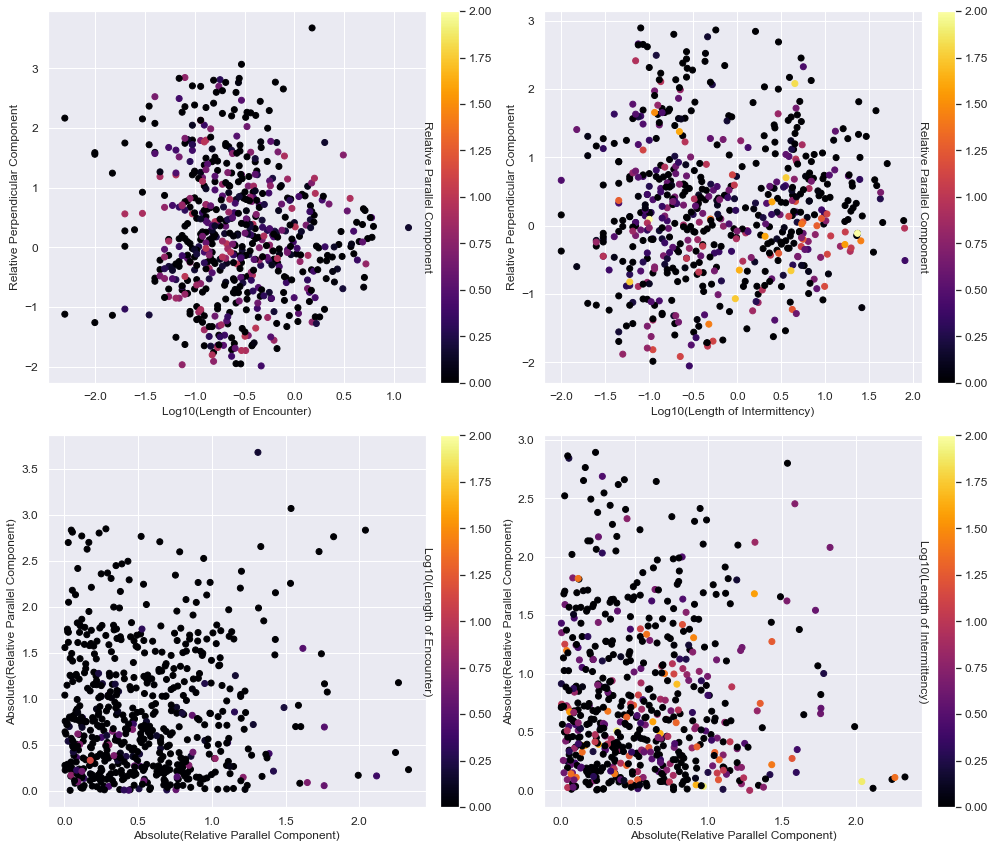

In [193]:
f, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize =(14,12), 
                            gridspec_kw={'height_ratios':[3,3],'width_ratios': [4,4]})

var = ax1.scatter(np.log10(resdf.length_of_encounter),(resdf.avg_perpendicular_encounter), 
                  c=(resdf.avg_parallel_encounter), cmap='inferno', vmin=0, vmax = 2)
# ax1.plot(fdf.avg_parallel_encounter, res1.intercept + res1.slope*fdf.avg_parallel_encounter, 
#          'lightgreen', linewidth=3)
# t = np.linspace(-1.5,2, 5)
# ax1.plot( t, x(t), '-')
ax1.set_xlabel('Log10(Length of Encounter)')
ax1.set_ylabel('Relative Perpendicular Component')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.2)
f.colorbar(var, cax=cax, orientation = 'vertical')
cax.get_yaxis().labelpad = -60
cax.set_ylabel('Relative Parallel Component', rotation=270)

var1 = ax2.scatter(np.log10(resdf.odor_intermittency),(resdf.avg_perpendicular_intermittency), 
                   c=(resdf.avg_parallel_intermittency),cmap='inferno',vmin = 0, vmax=2)

ax2.set_xlabel('Log10(Length of Intermittency)')
ax2.set_ylabel('Relative Perpendicular Component')

divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('right', size='5%', pad=0.2)
f.colorbar(var1, cax=cax1, orientation = 'vertical')
cax1.get_yaxis().labelpad = -60
cax1.set_ylabel('Relative Parallel Component', rotation=270)

var2 = ax3.scatter(np.abs(resdf.avg_parallel_intermittency),np.abs(resdf.avg_perpendicular_encounter), 
                  c=np.log10(resdf.length_of_encounter), cmap='inferno', vmin=0, vmax = 2)
ax3.set_xlabel('Absolute(Relative Parallel Component)')
ax3.set_ylabel('Absolute(Relative Parallel Component)')

divider = make_axes_locatable(ax3)
cax2 = divider.append_axes('right', size='5%', pad=0.2)
f.colorbar(var, cax=cax2, orientation = 'vertical')
cax2.get_yaxis().labelpad = -60
cax2.set_ylabel('Log10(Length of Encounter)', rotation=270)

var3 = ax4.scatter(np.abs(resdf.avg_parallel_intermittency),np.abs(resdf.avg_perpendicular_intermittency), 
                   c=np.log10(resdf.odor_intermittency),cmap='inferno',vmin = 0, vmax=2)
ax4.set_xlabel('Absolute(Relative Parallel Component)')
ax4.set_ylabel('Absolute(Relative Parallel Component)')

divider = make_axes_locatable(ax4)
cax3 = divider.append_axes('right', size='5%', pad=0.2)
f.colorbar(var1, cax=cax3, orientation = 'vertical')
cax3.get_yaxis().labelpad = -60
cax3.set_ylabel('Log10(Length of Intermittency)', rotation=270)


f.tight_layout()
figurefirst.mpl_functions.set_fontsize(f, 12)
f.savefig('../../Figure/RESDF.jpeg')

/Users/an/Documents/MyFiles/DataAnalysis/FlyDataAnalysis/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


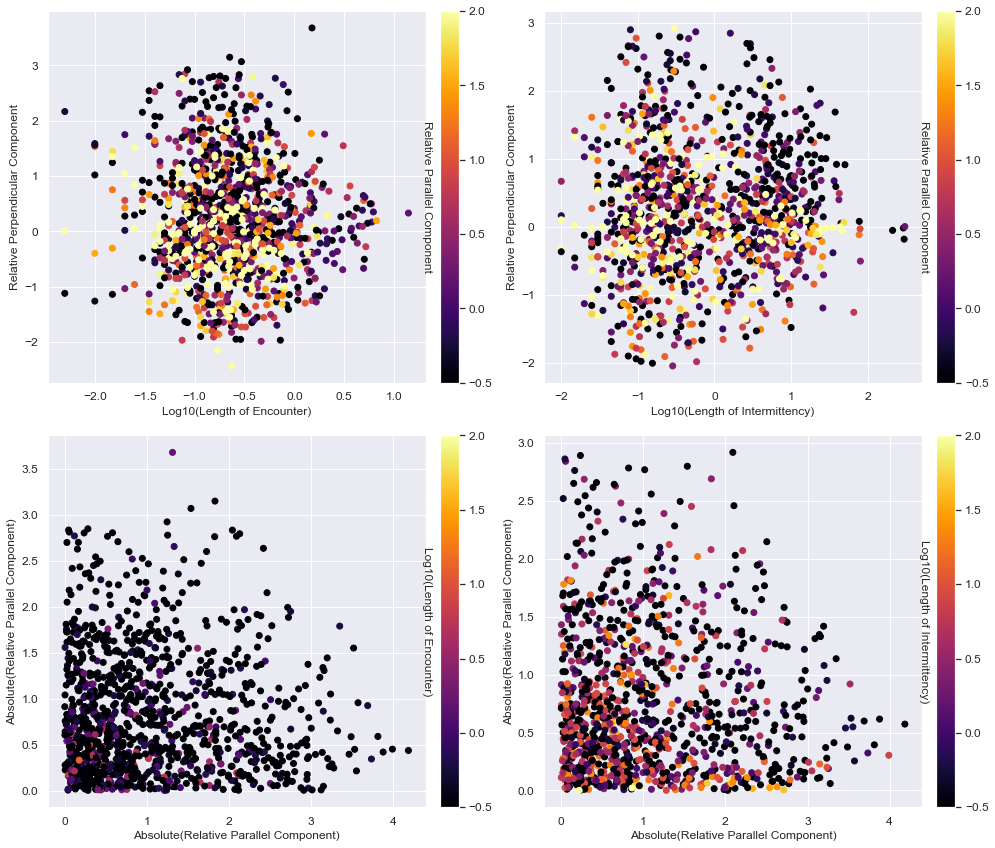

In [212]:
f, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize =(14,12), 
                            gridspec_kw={'height_ratios':[3,3],'width_ratios': [4,4]})

min_val = -0.5
max_val = 2
lblpad = -60
var = ax1.scatter(np.log10(fdf.length_of_encounter),(fdf.avg_perpendicular_encounter), 
                  c=(fdf.avg_parallel_encounter), cmap='inferno', vmin=min_val, vmax=max_val)
ax1.set_xlabel('Log10(Length of Encounter)')
ax1.set_ylabel('Relative Perpendicular Component')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.2)
f.colorbar(var, cax=cax, orientation = 'vertical')
cax.get_yaxis().labelpad = lblpad
cax.set_ylabel('Relative Parallel Component', rotation=270)

var1 = ax2.scatter(np.log10(fdf.odor_intermittency),(fdf.avg_perpendicular_intermittency), 
                   c=(fdf.avg_parallel_intermittency),cmap='inferno',vmin=min_val, vmax=max_val)

ax2.set_xlabel('Log10(Length of Intermittency)')
ax2.set_ylabel('Relative Perpendicular Component')

divider = make_axes_locatable(ax2)
cax1 = divider.append_axes('right', size='5%', pad=0.2)
f.colorbar(var1, cax=cax1, orientation = 'vertical')
cax1.get_yaxis().labelpad = lblpad
cax1.set_ylabel('Relative Parallel Component', rotation=270)

var2 = ax3.scatter(np.abs(fdf.avg_parallel_intermittency),np.abs(fdf.avg_perpendicular_encounter), 
                  c=np.log10(fdf.length_of_encounter), cmap='inferno', vmin=min_val, vmax=max_val)
ax3.set_xlabel('Absolute(Relative Parallel Component)')
ax3.set_ylabel('Absolute(Relative Parallel Component)')

divider = make_axes_locatable(ax3)
cax2 = divider.append_axes('right', size='5%', pad=0.2)
f.colorbar(var, cax=cax2, orientation = 'vertical')
cax2.get_yaxis().labelpad = lblpad
cax2.set_ylabel('Log10(Length of Encounter)', rotation=270)

var3 = ax4.scatter(np.abs(fdf.avg_parallel_intermittency),np.abs(fdf.avg_perpendicular_intermittency), 
                   c=np.log10(fdf.odor_intermittency),cmap='inferno',vmin=min_val, vmax=max_val)
ax4.set_xlabel('Absolute(Relative Parallel Component)')
ax4.set_ylabel('Absolute(Relative Parallel Component)')

divider = make_axes_locatable(ax4)
cax3 = divider.append_axes('right', size='5%', pad=0.2)
f.colorbar(var1, cax=cax3, orientation = 'vertical')
cax3.get_yaxis().labelpad = lblpad
cax3.set_ylabel('Log10(Length of Intermittency)', rotation=270)


f.tight_layout()
figurefirst.mpl_functions.set_fontsize(f, 12)
# f.savefig('../../Figure/fdffiltered.jpeg')

In [129]:
# f, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize =(14,12), 
#                             gridspec_kw={'height_ratios':[3,3],'width_ratios': [4,4]})
# f.suptitle('Influence of relative motion on odor encounters')

# ax1.scatter(fdf.avg_parallel_encounter,fdf.avg_perpendicular_encounter, c=np.log10(fdf.length_of_encounter), 
#             cmap='inferno', vmin= 0, vmax=2 )
# ax1.set_xlabel('Relative Parallel Component \n (a)')
# ax1.set_ylabel('Relative Perpendicular Component')

# ax2.scatter(fdf.avg_parallel_intermittency,fdf.avg_perpendicular_intermittency, c=np.log10(fdf.odor_intermittency),
#             cmap='inferno', vmin= 0, vmax=2)
# ax2.set_xlabel('Relative Parallel Component \n (b)')
# ax2.set_ylabel('Relative Perpendicular Component')


# ax3.scatter(fdf.avg_perpendicular_encounter, np.log10(fdf.length_of_encounter), 
#             c=fdf.avg_parallel_encounter, cmap='inferno', vmin= 0, vmax=2)
# ax3.set_xlabel('Relative Parallel Component  \n (c)')
# ax3.set_ylabel('log10_Length_of_encounter(secs)')


# ax4.scatter(fdf.avg_perpendicular_intermittency, np.log10(fdf.odor_intermittency), 
#             c=fdf.avg_parallel_intermittency, cmap='inferno', vmin= 0, vmax=2)
# ax4.set_xlabel('Relative Parallel Component  \n (d)')
# ax4.set_ylabel('log10_Length_of_intermittency(secs)')

# f.tight_layout()
# figurefirst.mpl_functions.set_fontsize(f, 13)
# # f.savefig('../../Figure/ContComponentPlotsLowRes.jpeg')

In [125]:
# f, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize =(14,12), 
#                             gridspec_kw={'height_ratios':[3,3],'width_ratios': [4,4]})
# f.suptitle('Influence of wind-sensor speed on odor encounters')
# ax1.set_xlabel('Sensor Speed during Encounter (m/s)')
# ax1.scatter(df2.speed_at_encounter, np.log10(df2.length_of_encounter), c=df2.avg_dist_from_source, cmap='inferno')
# ax1.set_ylabel('log10_Length_of_encounter(secs)')

# ax2.scatter(df2.speed_at_intermittency, np.log10(df2.odor_intermittency), c=df2.avg_dist_from_source, cmap='inferno')
# ax2.set_xlabel('Sensor Speed at Intermittency (m/s)')
# ax2.set_ylabel('log10_Odor_Intermittency(secs)')

# ax3.set_xlabel('Wind Speed during Encounter (m/s)')
# ax3.scatter(df2.wind_speed_encounter, np.log10(df2.length_of_encounter), c=df2.avg_dist_from_source, cmap='inferno')
# ax3.set_ylabel('log10_Length_of_encounter(secs)')

# ax4.scatter(df2.wind_speed_intermittency, np.log10(df2.odor_intermittency), c=df2.avg_dist_from_source, cmap='inferno')
# ax4.set_xlabel('Wind Speed at Intermittency (m/s)')
# ax4.set_ylabel('log10_Odor_Intermittency(secs)')

# f.tight_layout()
# figurefirst.mpl_functions.set_fontsize(f, 13)
# # f.savefig('../../Figure/speedvsencounter_notwindydot1hz.jpeg')

In [126]:
# f, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize =(14,12), 
#                             gridspec_kw={'height_ratios':[3,3],'width_ratios': [4,4]})

# f.suptitle('Influence of wind-sensor motion on odor encounters')
# ax1.set_xlabel('Streakline Relative Motion \n during Encounter (radians)')
# ax1.scatter(df2.streakline_relative_motion_encounter, np.log10(df2.length_of_encounter), c=df2.odor)
# ax1.set_ylabel('log10_Length_of_encounter(secs)')

# ax2.scatter(df2.streakline_relative_motion_intermittency, np.log10(df2.odor_intermittency), c=df2.odor)
# ax2.set_xlabel('Streakline Relative Motion \n during Intermittency (radians)')
# ax2.set_ylabel('log10_Odor_Intermittency(secs)')

# ax3.scatter(df2.relative_motion_to_wind_encounter/2, np.log10(df2.length_of_encounter), c=df2.odor)
# ax3.set_xlabel('Wind-Sensor Relative Motion \n during Encounter (radians)')
# ax3.set_ylabel('log10_Length_of_encounter(secs)')

# ax4.scatter(df2.relative_motion_to_wind_intermittency/2, np.log10(df2.odor_intermittency), c=df2.odor)
# ax4.set_xlabel('Wind-Sensor Relative Motion \n during Intermittency (radians)')
# ax4.set_ylabel('log10_Odor_Intermittency(secs)')


# f.tight_layout()
# figurefirst.mpl_functions.set_fontsize(f, 13)
# # f.savefig('../../Figure/motionvsencounter_notwindyHD.jpeg')

In [61]:
## Normalization
# normalized_fdf=(fdf-fdf.mean())/fdf.std()

## mean max normalization
# normalized_fdf=(fdf-fdf.min())/(fdf.max()-fdf.min())
# fdf.to_hdf(dir+'WindyStats.h5', key='df', mode='w')

In [20]:
fdf.keys()

Index(['avg_dist_along_streakline', 'avg_dist_from_source',
       'avg_dist_from_streakline', 'avg_parallel_encounter',
       'avg_perpendicular_encounter', 'avg_parallel_intermittency',
       'avg_perpendicular_intermittency', 'length_of_encounter',
       'odor_intermittency', 'speed_at_intermittency', 'speed_at_encounter'],
      dtype='object')

In [218]:
a = np.abs(fdf.avg_perpendicular_intermittency)
b = np.abs(fdf.avg_parallel_intermittency)

In [221]:
distance=smf.ols(formula='avg_dist_from_source ~ np.log10(length_of_encounter) + a+b', data=fdf).fit()
print(distance.summary())

                             OLS Regression Results                             
Dep. Variable:     avg_dist_from_source   R-squared:                         nan
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Thu, 09 Sep 2021   Prob (F-statistic):                nan
Time:                          12:38:47   Log-Likelihood:                    nan
No. Observations:                   916   AIC:                               nan
Df Residuals:                       916   BIC:                               nan
Df Model:                            -1                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/Users/an/Documents/MyFiles/DataAnalysis/FlyDataAnalysis/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [213]:
# odor_distance_model = smf.ols(formula='avg_dist_fromsource ~ odor + odor_intermittency + length_of_encounter + odor_stdev + tri_pressure + tri_temperature + linear_acc_x + linear_acc_y + linear_acc_z + imu_angular_x + imu_angular_y + imu_angular_z', data=fdf).fit()
encounters=smf.ols(formula='np.log10(length_of_encounter) ~ a+b', data=fdf).fit()
print(encounters.summary())

                                  OLS Regression Results                                 
Dep. Variable:     np.log10(length_of_encounter)   R-squared:                       0.049
Model:                                       OLS   Adj. R-squared:                  0.047
Method:                            Least Squares   F-statistic:                     29.13
Date:                           Thu, 09 Sep 2021   Prob (F-statistic):           4.58e-13
Time:                                   12:36:25   Log-Likelihood:                -764.02
No. Observations:                           1137   AIC:                             1534.
Df Residuals:                               1134   BIC:                             1549.
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

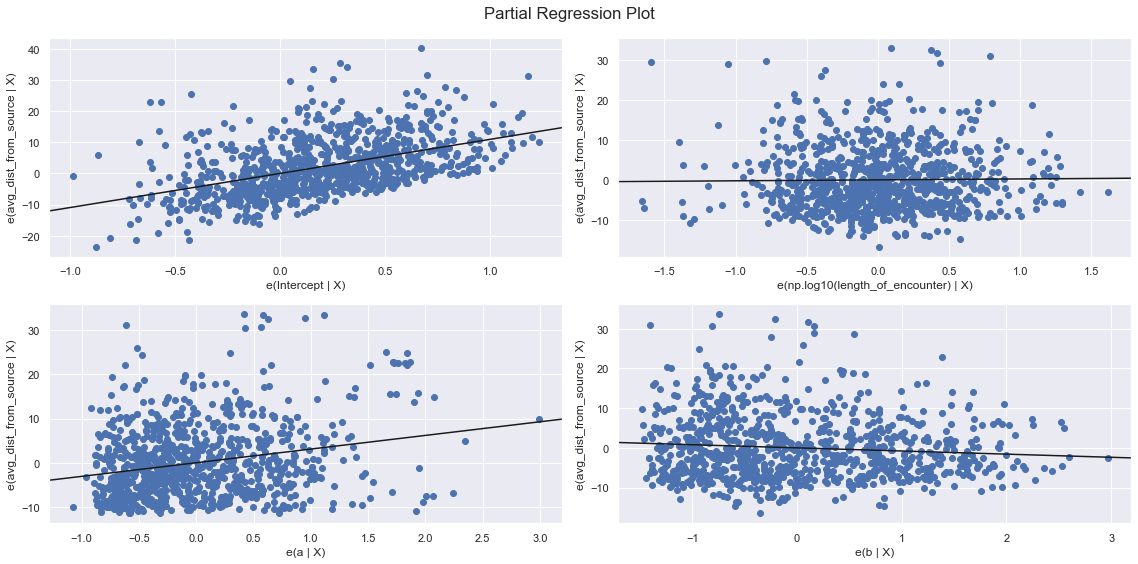

In [214]:
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
fig = sm.graphics.plot_partregress_grid(distance)
fig.tight_layout(pad=1.0)
# fig.savefig('regressplot.jpeg')

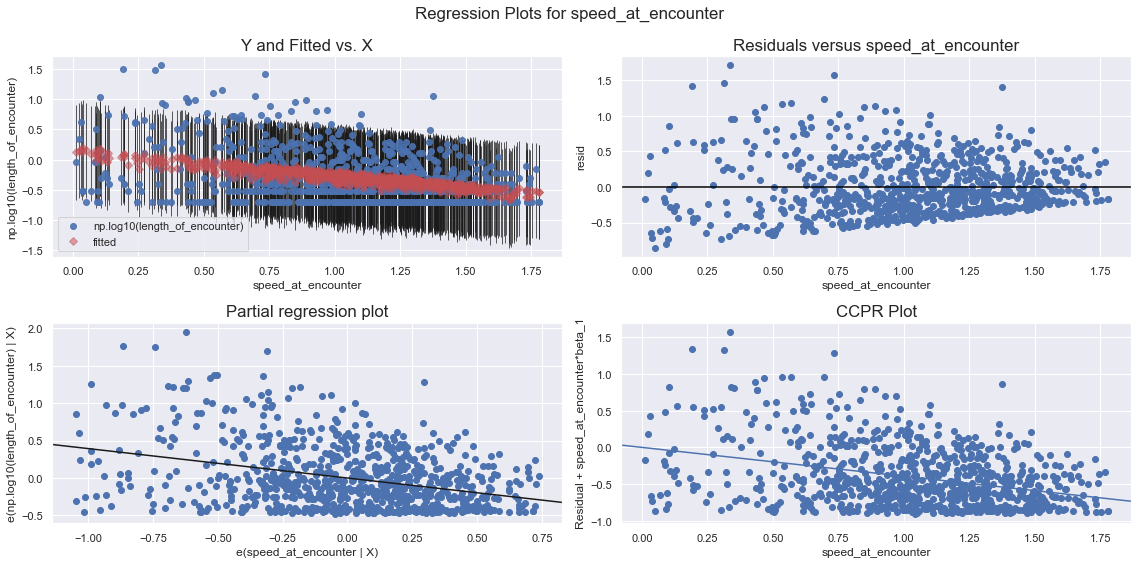

In [130]:
fig = sm.graphics.plot_regress_exog(encounters, "speed_at_encounter")
fig.tight_layout(pad=1.0)

### Finding odor encounter distance from source

In [ ]:
# df_pos['time'] = df_tmp['time']
# df_pos['distance']=hp.haversine_distance(df_tmp._ublox_gps_fix_latitude.astype(float),df_tmp._ublox_gps_fix_longitude.astype(float), 39.67650835454546,-119.82060767454543)
# df_pos['odor_concentration'] = df_tmp['_analog_output_data']

#### Not Required Stats

In [ ]:

## Odor Standard Deviation
i = 0
st_dev = []
while i<len(index):
    st_dev.append(np.std(df.odor[index[i]]))
    i+=1
fdf['odor_stdev'] = st_dev

## Trisonica Mean Pressure
i = 0
pressure = []
while i<len(index):
    pressure.append(np.mean(df.trisonica_pressure[index[i]]))
    i+=1
fdf['tri_pressure'] = pressure

## Trisonica Mean Temperature
i = 0
temperature = []
while i<len(index):
    temperature.append(np.mean(df.trisonica_temperature[index[i]]))
    i+=1
fdf['tri_temperature'] = temperature

## Trisonica Mean Linear acceleration
i = 0
linear_acc_x = []
while i<len(index):
    linear_acc_x.append(np.mean(df.imu_linear_acc_x[index[i]]))
    i+=1
fdf['linear_acc_x'] = linear_acc_x

i = 0
linear_acc_y = []
while i<len(index):
    linear_acc_y.append(np.mean(df.imu_linear_acc_y[index[i]]))
    i+=1
fdf['linear_acc_y'] = linear_acc_y

i = 0
linear_acc_z = []
while i<len(index):
    linear_acc_z.append(np.mean(df.imu_linear_acc_z[index[i]]))
    i+=1
fdf['linear_acc_z'] = linear_acc_z

## Trisonica Mean Angular vel
i = 0
angular_vel_x = []
while i<len(index):
    angular_vel_x.append(np.mean(df.imu_angular_x[index[i]]))
    i+=1
fdf['imu_angular_x'] = angular_vel_x

i = 0
angular_vel_y = []
while i<len(index):
    angular_vel_y.append(np.mean(df.imu_angular_y[index[i]]))
    i+=1
fdf['imu_angular_y'] = angular_vel_y

i = 0
angular_vel_z = []
while i<len(index):
    angular_vel_z.append(np.mean(df.imu_angular_z[index[i]]))
    i+=1
fdf['imu_angular_z'] = angular_vel_z